### Libraries

In [8]:
# import required libraries
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

### Reading shots data

In [3]:
bl_shots = pd.read_csv('data/bundesliga/shots.csv')
epl_shots = pd.read_csv('data/epl/shots.csv')
lal_shots = pd.read_csv('data/laliga/shots.csv')
l1_shots = pd.read_csv('data/ligue1/shots.csv')
ser_shots = pd.read_csv('data/seriea/shots.csv')

In [4]:
# concatenate
shots_list = [bl_shots, epl_shots, lal_shots, l1_shots, ser_shots]

shots = pd.DataFrame()
for i in shots_list:
    shots = pd.concat([shots, i])

In [5]:
shots.shape

(40461, 14)

In [7]:
shots.head()

,game_id,period_id,team_id,player_id,type_id,type_name,subtype_id,subtype_name,tag_id,tag_name,x_start,y_start,x_end,y_end
0,2516739,1,2444,209091,10,shot,100,shot,"[402, 201, 1206, 1801]","['right foot', 'opportunity', 'position: goal ...",83,66,0.0,0.0
1,2516739,1,2444,134383,10,shot,100,shot,"[101, 403, 201, 1205, 1801]","['goal', 'head/body', 'opportunity', 'position...",95,59,0.0,0.0
2,2516739,1,2446,105619,10,shot,100,shot,"[402, 201, 1201, 1801]","['right foot', 'opportunity', 'position: goal ...",91,66,100.0,100.0
3,2516739,1,2446,14786,10,shot,100,shot,"[402, 201, 1212, 1802]","['right foot', 'opportunity', 'position: out l...",88,49,100.0,100.0
4,2516739,1,2444,20475,10,shot,100,shot,"[402, 1216, 1802]","['right foot', 'position: out high right', 'no...",74,42,0.0,0.0


### Plot All Shots

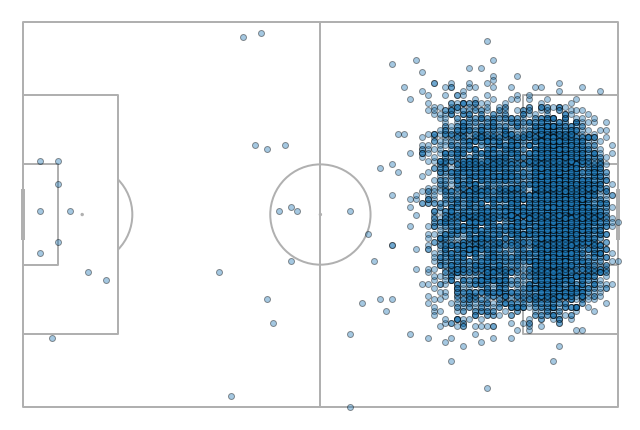

In [36]:
# Visual xG values on Pitch
pitch = Pitch(pitch_type='wyscout')  
fig, ax = pitch.draw(figsize=(9, 9))
ax.scatter(bl_shots['x_start'], bl_shots['y_start'], edgecolor = 'black', alpha = 0.4)
plt.show()

In [88]:
bl_player_names = pd.read_csv('data/bundesliga/player_names.csv')
bl_shots = bl_shots.merge(bl_player_names, on = ['player_id'])

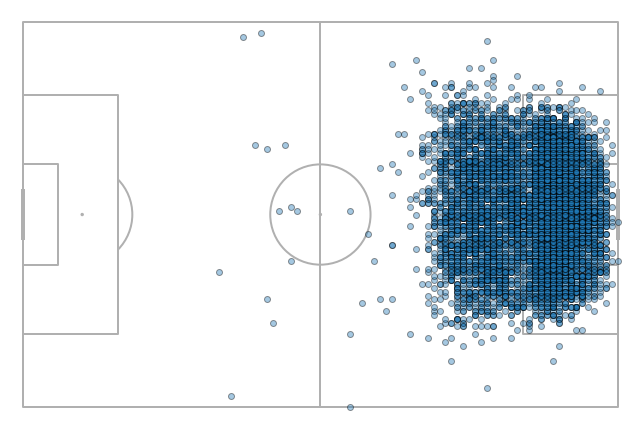

In [89]:
new_bl_shots = bl_shots[~(((bl_shots['x_start'] > 0) & (bl_shots['x_start'] < 20)) & ((bl_shots['y_start'] < 86) & (bl_shots['y_start'] > 20)))]

# Visual xG values on Pitch
pitch = Pitch(pitch_type='wyscout')  
fig, ax = pitch.draw(figsize=(9, 9))
ax.scatter(new_bl_shots['x_start'], new_bl_shots['y_start'], edgecolor = 'black', alpha = 0.4)
plt.show()

In [90]:
bl_shots[(((bl_shots['x_start'] > 0) & (bl_shots['x_start'] < 20)) & ((bl_shots['y_start'] < 86) & (bl_shots['y_start'] > 20)))]

,game_id,period_id,team_id,player_id,type_id,type_name,subtype_id,subtype_name,tag_id,tag_name,x_start,y_start,x_end,y_end,nickname_x,nickname_y
1371,2516742,1,2462,3535,10,shot,100,shot,"[401, 201, 1204, 1801]","['left foot', 'opportunity', 'position: goal c...",5,82,100.0,100.0,J. de Guzmán,J. de Guzmán
1863,2516948,2,2463,15317,10,shot,100,shot,"[402, 201, 1210, 1802]","['right foot', 'opportunity', 'position: out l...",14,67,100.0,100.0,L. Bittencourt,L. Bittencourt
2087,2516989,2,2975,173214,10,shot,100,shot,"[402, 201, 1212, 1802]","['right foot', 'opportunity', 'position: out l...",6,57,100.0,100.0,T. Werner,T. Werner
2088,2516989,2,2975,173214,10,shot,100,shot,"[402, 201, 1201, 1801]","['right foot', 'opportunity', 'position: goal ...",11,65,100.0,100.0,T. Werner,T. Werner
2371,2516989,2,2975,289711,10,shot,100,shot,"[403, 201, 1214, 1802]","['head/body', 'opportunity', 'position: out hi...",6,42,100.0,100.0,N. Keïta,N. Keïta
3715,2516989,2,2975,15069,10,shot,100,shot,"[101, 403, 201, 1204, 1801]","['goal', 'head/body', 'opportunity', 'position...",8,49,100.0,100.0,W. Orban,W. Orban
5749,2516989,2,2975,56274,10,shot,100,shot,"[101, 1901, 402, 201, 1203, 1801]","['goal', 'counter attack', 'right foot', 'oppo...",3,49,100.0,100.0,Y. Poulsen,Y. Poulsen
5750,2516989,2,2975,56274,10,shot,100,shot,"[402, 201, 1203, 1801]","['right foot', 'opportunity', 'position: goal ...",3,36,100.0,100.0,Y. Poulsen,Y. Poulsen
6489,2516989,2,2975,296341,10,shot,100,shot,"[401, 201, 1210, 1802]","['left foot', 'opportunity', 'position: out lo...",3,60,100.0,100.0,Bernardo,Bernardo
6763,2516958,2,2443,56424,10,shot,100,shot,"[402, 201, 1207, 1801]","['right foot', 'opportunity', 'position: goal ...",6,36,100.0,100.0,A. Jóhannsson,A. Jóhannsson


In [1]:
pip install socceraction

Note: you may need to restart the kernel to use updated packages.


In [4]:
from socceraction.data.wyscout import PublicWyscoutLoader 

# load public wyscout data
wyscout_data = PublicWyscoutLoader()

# retrieve all serie a games
seriea_games = wyscout_data.games(competition_id = 524, season_id = 181248)["game_id"]

df = wyscout_data.players(2576016)

C:\Users\Public\anaconda3\lib\site-packages\socceraction\data\wyscout\loader.py:272: UserWarning: A player with ID=0 was substituted in the 90th minute of game 2576016, but could not be found on the bench.
  warnings.warn(


In [9]:
# Italy 17/18, competition_id = 524, season_id = 181248
seriea_games = wyscout_data.games(competition_id = 524, season_id = 181248)["game_id"]

for i in seriea_games:
    print(i)
    df = wyscout_data.players(i)
    df.to_csv(f'seriea_game_players/{i}.csv', index = False)
    

2576335
2576336
2576329
2576330
2576331
2576332
2576333
2576337
2576338
2576334
2576322
2576325
2576324
2576319
2576320
2576323
2576327
2576328
2576326
2576321
2576316
2576317
2576309
2576310
2576312
2576313
2576318
2576315
2576311
2576314
2576303
2576305
2576299
2576301
2576304
2576307
2576308
2576306
2576302
2576300
2576293
2576295
2576291
2576294
2576297
2576298
2576290
2576289
2576292
2576296
2576280
2576282
2576283
2576284
2576285
2576286
2576287
2576288
2576279
2576281
2576274
2576275
2576269
2576271
2576273
2576276
2576272
2576270
2576277
2576278
2576268
2576267
2576260
2576261
2576262
2576265
2576264
2576259
2576263
2576266
2576221
2576224
2576228
2576223
2576220
2576222
2576227
2576252
2576253
2576255
2576249
2576250
2576251
2576256
2576257
2576258
2576254
2576240
2576244
2576239
2576241
2576242
2576243
2576247
2576245
2576246
2576248
2576209
2576234
2576233
2576229
2576232
2576235
2576236
2576238
2576230
2576231
2576237
2576226
2576225
2576219
2576215
2576214
2576211
2576213


C:\Users\Public\anaconda3\lib\site-packages\socceraction\data\wyscout\loader.py:272: UserWarning: A player with ID=0 was substituted in the 90th minute of game 2576016, but could not be found on the bench.
  warnings.warn(


2576014
2576018
2576015
2575999
2576002
2576003
2576004
2576005
2576006
2576007
2576008
2576000
2576001
2575992
2575989
2575993
2575994
2575997
2575998
2575996
2575995
2575991
2575990
2575981
2575980
2575986
2575979
2575982
2575983
2575988
2575984
2575985
2575970
2575971
2575972
2575974
2575975
2575977
2575978
2575976
2575969
2575973
2575960
2575961
2575963
2575965


C:\Users\Public\anaconda3\lib\site-packages\socceraction\data\wyscout\loader.py:272: UserWarning: A player with ID=0 was substituted in the 56th minute of game 2575965, but could not be found on the bench.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\socceraction\data\wyscout\loader.py:272: UserWarning: A player with ID=0 was substituted in the 62th minute of game 2575965, but could not be found on the bench.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\socceraction\data\wyscout\loader.py:272: UserWarning: A player with ID=0 was substituted in the 88th minute of game 2575965, but could not be found on the bench.
  warnings.warn(


2575966
2575967
2575968
2575959


C:\Users\Public\anaconda3\lib\site-packages\socceraction\data\wyscout\loader.py:272: UserWarning: A player with ID=0 was substituted in the 74th minute of game 2575959, but could not be found on the bench.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\socceraction\data\wyscout\loader.py:272: UserWarning: A player with ID=0 was substituted in the 81th minute of game 2575959, but could not be found on the bench.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\socceraction\data\wyscout\loader.py:272: UserWarning: A player with ID=0 was substituted in the 84th minute of game 2575959, but could not be found on the bench.
  warnings.warn(


2575962
2575964
